# 1. 선 그래프 (Line Graph) 그리기
## 1.1 선 그래프(꺽은선 그래프)
- 점과 점을 선으로 연결한 그래프
- 시간의 흐름에 따른 변화를 표현할 때 많이 사용한다. (시계열)
- `plot([x], y)` 
    - 1번인수 : x값(생략가능), 2번인수 y값
    - 인수가 하나인 경우 y 축의 값으로 설정되고 X값은 (0 ~ len(y)-1) 범위로 지정된다.
    - x,y 의 인수는 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 size는 같아야 한다.
- 하나의 axes(subplot)에 여러 개의 선 그리기
    - 같은 axes에 plot()를 여러번 실행한다.

## 1.2 선 스타일
- https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

10 10


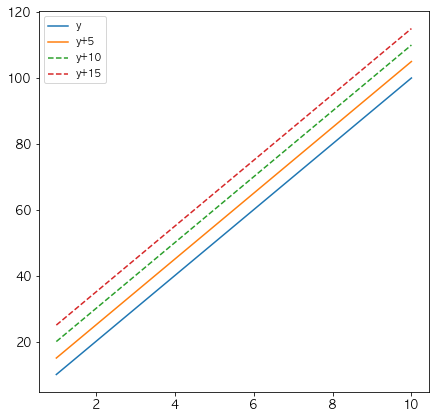

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

x = range(1,11)
y = pd.Series(range(10,110,10))
y2 = y+5
y3 = y+10
y4 = y+15

print(len(x),len(y))

plt.figure(figsize=(7,7))
# (X축값, y축값)
plt.plot(x,y, label= 'y')
plt.plot(x , y2, label = 'y+5',linestyle= '-')
plt.plot(x , y3, label = 'y+10',linestyle= '--')
plt.plot(x , y4, label = 'y+15',linestyle= '--')

plt.legend() #범례
plt.show()

In [19]:
df = pd.read_csv('data/서울시 연도별 황사 경보발령 현황.csv')
df.shape
df.head

<bound method NDFrame.head of       년도  주의보 발령횟수  주의보 발령일수  경보 발령횟수  경보 발령일수  관측일수  최대농도(㎍/㎥/시)
0   2006         4         5        1        2    11         2941
1   2007         3         4        1        1    12         1355
2   2008         1         1        1        1    11          933
3   2009         2         3        2        3     9         1157
4   2010         4         5        2        3    15         1354
5   2011         4         7        0        0     9          662
6   2012         0         0        0        0     1          338
7   2013         0         0        0        0     3          226
8   2014         0         0        0        0    10          259
9   2015         1         2        1        2    15          902
10  2016         0         0        0        0     7          481
11  2017         0         0        0        0    10          423>

## 1.3 선 그래프 활용
- [서울시 연도별 황사 경보발령 현황](http://data.seoul.go.kr/dataList/datasetView.do?infId=OA-2227&srvType=S&serviceKind=1&currentPageNo=1)
- 연도별 관측일수와 황사최대농도의 변화를 그래프로 시각화

In [26]:
df.rename(columns={'최대농도(㎍/㎥/시)':'최대농도'},inplace=True)

<function matplotlib.pyplot.show(close=None, block=None)>

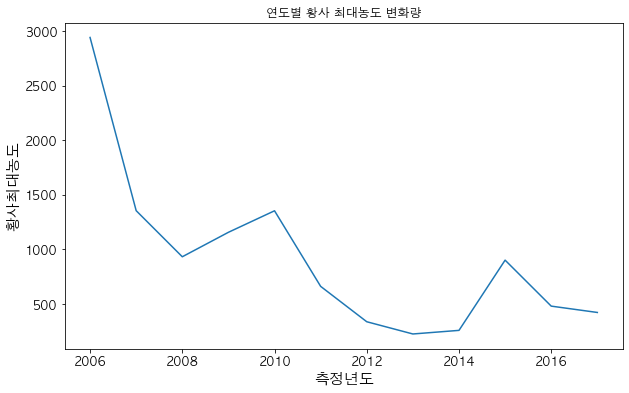

In [28]:
#년도흐름에 따른 최대농도의 변화량.
#X축: 시간, Y축: 값
plt.figure(figsize=(10,6))

plt.plot(df['년도'],df['최대농도'])
#axes 제목
plt.title('연도별 황사 최대농도 변화량')
#x,y축 label
plt.xlabel('측정년도')
plt.ylabel('황사최대농도')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

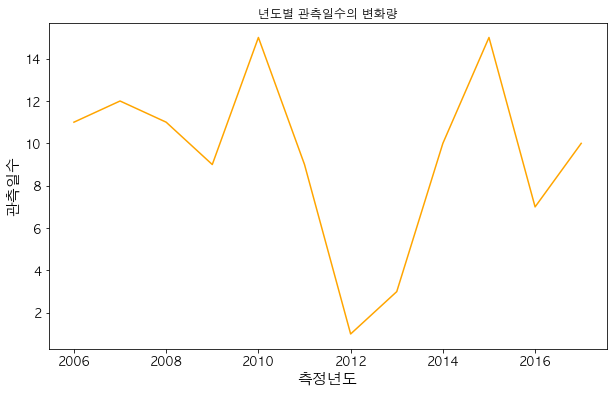

In [30]:
#년도별 관측일수의 변화량
plt.figure(figsize=(10,6))

plt.plot(df['년도'],df['관측일수'], c = 'orange')
#axes 제목
plt.title('년도별 관측일수의 변화량')
#x,y축 label
plt.xlabel('측정년도')
plt.ylabel('관측일수')
plt.show

## 최대 농도와 관측일 수의 연도별 변화를 시각화
- ### 하나의 축을 공유하고 두개의 축을 가지는 그래프 그리기
- 값의 범위(Scale)이 다른 두 값과 관련된 선그래프를 한 Axes(subplot)에 그리는 경우
- X축을 공유해 2개의 Y축을 가지는 그래프
    - axes.twinx() 를 이용해 axes를 복사
- Y축을 공유해 2개의 X축을 가지는 그래프
    - axes.twiny() 를 이용해 axes를 복사

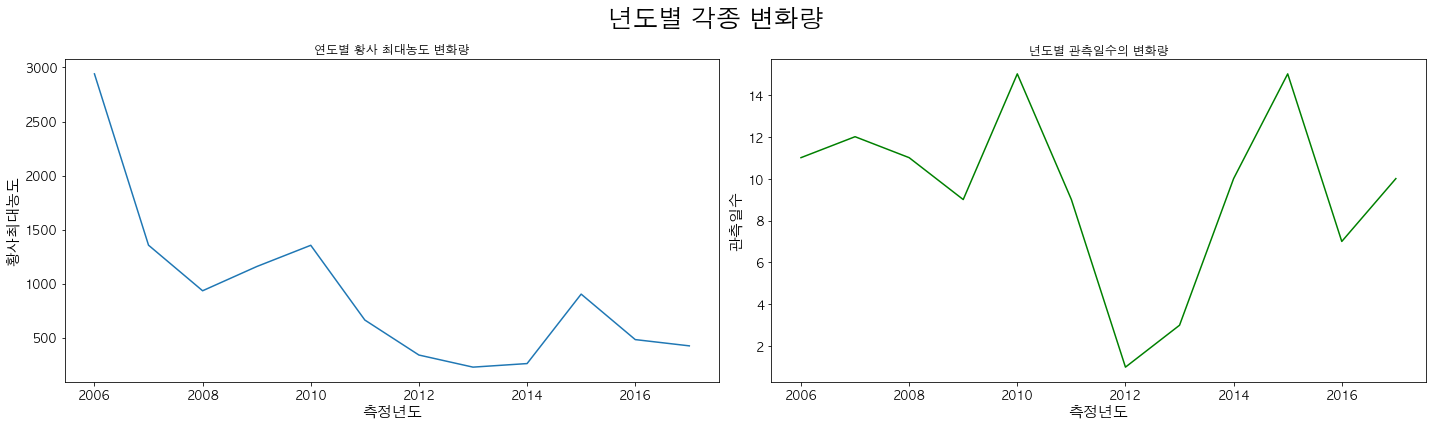

In [33]:
# 한 figure내의 다른 axes(subplot)에 각각 그리기.
fig = plt.figure(figsize=(20,6))
fig.suptitle('년도별 각종 변화량', fontsize=25) # figure의 title

plt.subplot(1,2,1)
plt.plot(df['년도'],df['최대농도'])
plt.title('연도별 황사 최대농도 변화량')
plt.xlabel('측정년도')
plt.ylabel('황사최대농도')

plt.subplot(1,2,2)
plt.plot(df['년도'],df['관측일수'], c = 'green')
plt.title('년도별 관측일수의 변화량')
plt.xlabel('측정년도')
plt.ylabel('관측일수')

plt.tight_layout()
plt.show()


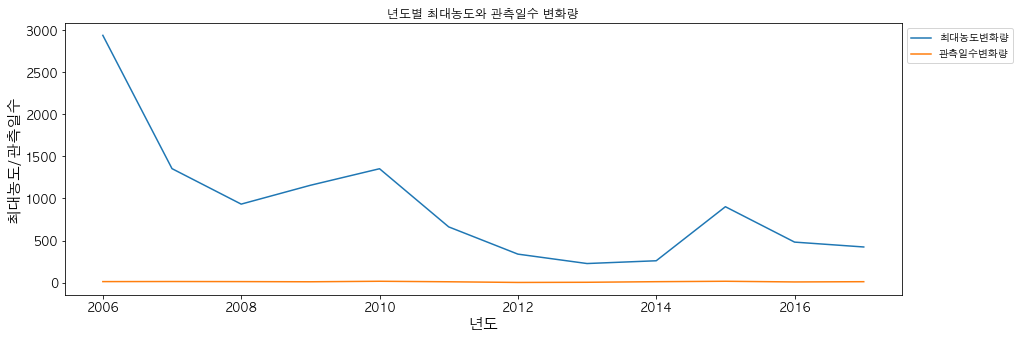

In [54]:
# 하나의 axes(subplot)에 두개를 같이 그리기
plt.figure(figsize=(15,5))

plt.plot(df['년도'], df['최대농도'], label = '최대농도변화량')
plt.plot(df['년도'], df['관측일수'], label = '관측일수변화량')

plt.title('년도별 최대농도와 관측일수 변화량')
plt.xlabel('년도')
plt.ylabel('최대농도/관측일수')

plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

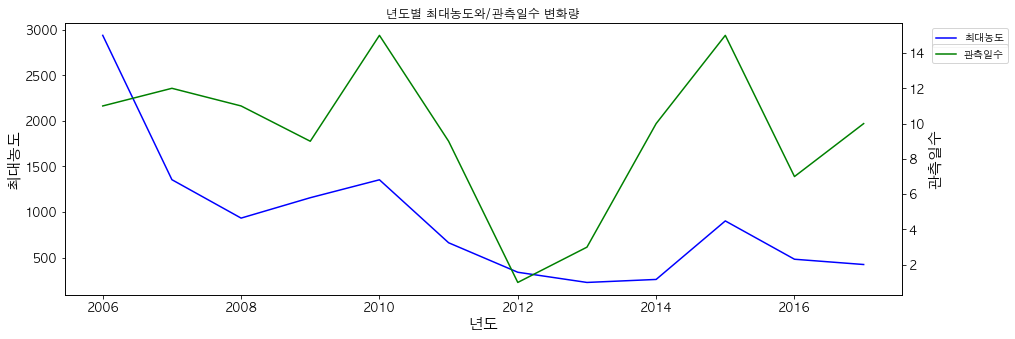

In [53]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,1,1) #plt.gca(): AxesSubplot
ax2 = ax1.twinx()

ax1.plot(df['년도'], df['최대농도'],label = '최대농도', color = 'blue')
ax2.plot(df['년도'], df['관측일수'],label = '관측일수', c = 'green')

ax1.set_xlabel('년도')
ax1.set_ylabel('최대농도')
ax2.set_ylabel('관측일수')

ax1.set_title('년도별 최대농도와/관측일수 변화량')


ax1.legend(bbox_to_anchor=(1.03,1),loc='upper left')
ax2.legend(bbox_to_anchor=(1.03,0.94),loc='upper left')

plt.show()

> # Legend box 위치 설정
- Axes 안의 정해진 위치에 설정.
    - loc='상하위치   좌우위치'
    - 상하: lower,center,upper
    - 좌우: left,center, right
    - 기본: best
    - ax1.legend(loc='upper center')
- 원하는 위치를 지정
    - bbox_to_anchor, loc 두개 매개변수 이용
    - bbox_to_anchor: legend box=의 Axes상의 위치
        - (상하,좌우)
        - 전체 Axes(subplot)기준
            - 상단: (0,1), (1,1)
            - 하단: (0,0), (1,0)
            
    - loc: legend box의 기준위치
    - legend box의 loc 을 Axes(Subplot)의 bbox_to_anchor에 위치
    - ax1.legend(bbox_to_anchor=(1,1), loc='upper left')

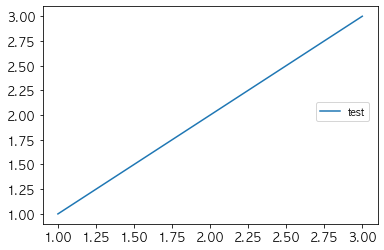

In [52]:
plt.plot([1,2,3],[1,2,3], label = 'test')
#plt.legend(lopc='best')
#plt.legend(bbox_to_anchor=(1,0), loc='lower left' #Axes의 1,0 포인트에 legend box의 아래, 왼쪽 포인트를 위치시킨다.
# plt.legend(bbox_to_anchor=(1,0.45), loc = 'lower left')
# plt.legend(bbox_to_anchor=(1.1,0.45), loc = 'lower left')
plt.legend(bbox_to_anchor=(0.8,0.45), loc = 'lower left')
plt.show()

In [ ]:
df['']

# 2. 산점도 (Scatter Plot) 그리기
## 2.1 산점도(산포도)
- X와 Y축을 가지는 좌표평면상 관측값들을 점을 찍어 표시하는 그래프
- 변수(Feature)간의 상관성이나 관측값들 간의 군집 분류를 확인할 수 있다.
- `scatter()` 메소드 사용
    - 1번인수 : x값, 2번인수 y값
    - x와 y값들을 모두 매개변수로 전달해야 한다.
    - x,y 의 인수는 스칼라 실수나 리스트 형태의 객체들을 넣는다.
        - 리스트
        - 튜플
        - numpy 배열 (ndarray)
        - 판다스 Series
    - x와 y의 원소의 수는 같아야 한다.

In [57]:
import numpy as np

x = np.arange(10,400,20)
y = np.arange(10,400,20)

x.shape, y.shape

((20,), (20,))

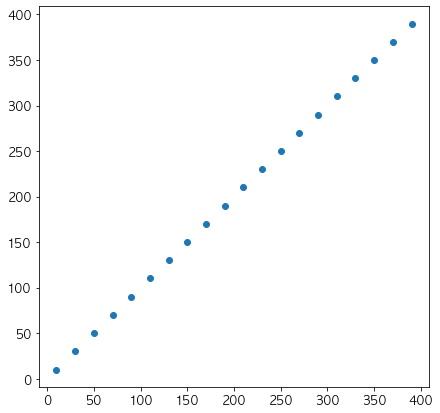

In [59]:
plt.figure(figsize=(7,7))
plt.scatter(x,y) #x와 y같은 인덱스의 값끼리 묶어서 점을 찎는다.

plt.show()

In [60]:
y2 = np.random.randint(100,300,20) #100 ~300-1 사이에서 임의의 정수 20개를 추출
y2

array([178, 193, 145, 137, 179, 249, 273, 181, 124, 152, 285, 282, 231,
       196, 110, 116, 175, 151, 201, 132])

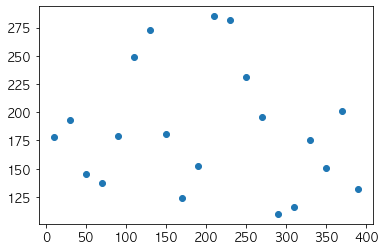

In [61]:
plt.scatter(x,y2)
plt.show()

## 2.2 설정
- marker (마커)
    - marker란 점의 모양을 말하며 미리정의된 값으로 변경할 수있다.
    - scatter() 메소드의 marker 매개변수를 이용해 변경한다. 
    - https://matplotlib.org/stable/api/markers_api.html
- s
    - 마커의 크기
    - 리스트형태(리스트, 튜플)로 지정
- alpha    
    - 하나의 마커에 대한 투명도
    - 0 ~ 1 사이 실수를 지정 (default 1)

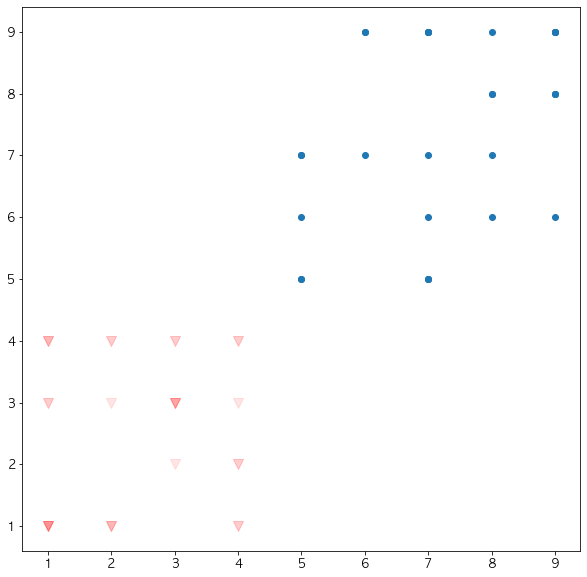

In [70]:
plt.figure(figsize=(10,10))
plt.scatter(x=np.random.randint(1,5,30), y=np.random.randint(1,5,30), 
            marker='v', # marker(점)스타일
            color='red',
            s= 100, #maker zize
            alpha = 0.1) # 투명도0-1
           
plt.scatter(x=np.random.randint(5,10,30), y=np.random.randint(5,10,30))
plt.show()

## 2.3 산점도 활용

In [71]:
df

,년도,주의보 발령횟수,주의보 발령일수,경보 발령횟수,경보 발령일수,관측일수,최대농도
0,2006,4,5,1,2,11,2941
1,2007,3,4,1,1,12,1355
2,2008,1,1,1,1,11,933
3,2009,2,3,2,3,9,1157
4,2010,4,5,2,3,15,1354
5,2011,4,7,0,0,9,662
6,2012,0,0,0,0,1,338
7,2013,0,0,0,0,3,226
8,2014,0,0,0,0,10,259
9,2015,1,2,1,2,15,902


### 경보 발령횟수와 관측일수 간의 관계
- 경보발령횟수가 많았던 년도는 관측일수도 길었나?

In [72]:
df[['경보 발령횟수','관측일수']]

,경보 발령횟수,관측일수
0,1,11
1,1,12
2,1,11
3,2,9
4,2,15
5,0,9
6,0,1
7,0,3
8,0,10
9,1,15


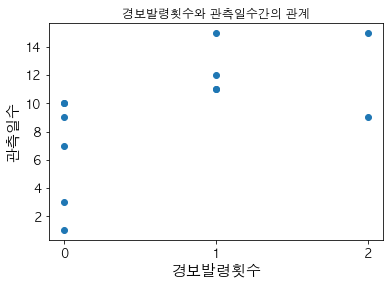

In [77]:
plt.scatter(df['경보 발령횟수'],df['관측일수'])

plt.title('경보발령횟수와 관측일수간의 관계')
plt.xlabel('경보발령횟수')
plt.ylabel('관측일수')

# x축 0눈금(tick) 재조정 -> xtick
plt.xticks([0,1,2])#(눈금의 위치, 눈금 label) label 생략 -> 눈금의 value(값)이 label이 된다.
plt.show()

In [78]:
# 두 컬러(변수)간의 상관관계(한쪽의 값이 증가할때 다른쪽 값은 증가 or 감소 or 관계없음)를 계산
# - 정성적판단: 산점도(scatter plat)
# - 정량적판단: 상관계수 계산
# 상관관계: 양의 상관계(증강이 같은것), 음의 상관관계(증감이 반대인것)
# 상관계수: -1 ~ +! 실수
# 음수 - 음의상관관계, 양수 - 양의상관관계, 0 - 관계없다.
# +-1 에 가까울수록 관계썽 커진다. 0에 가까울 수록 관계성이 약해진다.
# 1 ~ 0.7   : 아주 강한 상관관계
# 0.7 ~ 0.3 : 강한 상관관계
# 0.3 ~ 0.1 : 약한 상관관계
# 0.1 ~ 0   : 상관성(관계)이 없다.

import numpy as np
np.corrcoef(df['경보 발령횟수'], df['관측일수'])  #0.6: 양의상관관계(양수).강한 관계성을 가진다.


array([[1.        , 0.60416124],
       [0.60416124, 1.        ]])

In [79]:
df[['경보 발령횟수','관측일수']].corr()

,경보 발령횟수,관측일수
경보 발령횟수,1.000000,0.604161
관측일수,0.604161,1.000000


In [ ]:
# diamond

# 3. 막대그래프 (Bar plot) 그리기
## 3.1 막대그래프(Bar plot)

- 수량을 막대 형식으로 나타낸 그래프
- axes.bar(x, height) 메소드 사용
    - x : x값, height:  막대 높이
        - X는 분류값, height는 개수
- axes.barh(y, width) 메소드
    - 수평막대 그래프
    - 1번인수: y값, 2번인수: 막대 너비    

## 3.2 막대그래프 활용
- [강수량추이](http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=1401)
- 2018년 계절별 강수량